<table>
<thead>
  <tr>
    <td></td>
    <td>
        Kinga Węzka <br>
        kinga.wezka@pw.edu.pl <br>
        Warsaw University of Technology  <br>
Faculty Geodesy and Cartography <br>
<a ref="https://www.google.com/maps/place/Gmach+G%C5%82%C3%B3wny+Politechniki+Warszawskiej/@52.220656,21.0094422,19z/data=!3m1!4b1!4m5!3m4!1s0x471ecce951c85a19:0x712b0e1503c42b91!8m2!3d52.220656!4d21.0099894"> N 52&ordm; 12' 45&quot; / E 21&ordm; 03' 51&quot;</a>
    </td>
    <td>
<a rel="license" href="https://www.pw.edu.pl"><img alt="Politechnika Warszawska" style="border-width:0" src="https://www.pw.edu.pl/design/pw/images/znak-pw.png" width="50%" /></a>
    </td>
  </tr>
</thead>
</table>

<div class="alert alert-block alert-success">
<b> Temat: </b> 
    Geometria obliczeniowa - interpolacje
</div>

1. [Interpolacja liniowa (1D)](#zad1)
    1. [Dane](#zad1a)
    2. [Zadanie](#zad1b)
2. [Interpolacja dwuliniowa (2D)](#zad2)
    1. [Zadanie interpolacja dwuliniowa](#zad2a)
    2. [Zadanie interpolacja dwuliniowa - wyszukiwanie najbliższych punktów](#zad2b)
3. [Porównanie interpolacji dostepnych w bibliotekach - praca domowa](#zad3)   

In [1]:
from IPython.display import display, Markdown, Latex, Image 

# importowanie bibliotek i konfiguracj matplotlib 
import numpy as np
from numpy.linalg import inv
from math import pi, sin, cos, sqrt, exp
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.patches import Polygon
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['lines.linestyle'] = '-.'
mpl.rcParams['xtick.labelsize'] = 11
mpl.rcParams['ytick.labelsize'] = 11
mpl.rcParams['axes.titlesize'] = 11
mpl.rcParams['axes.labelsize'] = 11
mpl.rcParams['axes.grid'] = True
mpl.rcParams['lines.markersize'] ** 2. # marker size in scatter

# Wyświetlanie wykresów - metody magiczne
#  do wyświetlania wykresów statyczny w komórce
%matplotlib inline 
# do wyświetlania wykresów interaktywnych:
#%matplotlib notebook 

### 1: Interpolacja liniowa 1D <a name="zad1"></a>
Interpolacja liniowa – metoda przybliżenia dowolnej funkcji $f$ ciągłej w przedziale 
$[x_{0},\,x_{1}]\in R^{1}$, której wartości $  f(x_{i})=y_{i}\in R^{1},\;i=0,\,1$
są dane tylko w dwóch punktach $x_{i}\in R^{1}$ za pomocą funkcji liniowej.

Liniowa funkcja interpolująca $L(x)$ w przedziale $[x_{0},\,x_{1}]$ ma postać:

$$L(x)=y_{0}+{\frac {y_{1}-y_{0}}{x_{1}-x_{0}}}(x-x_{0}).$$


<a rel="license" href="https://upload.wikimedia.org"><img alt="Interpolacja dwuliniowa" style="border-width:0" src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/LinearInterpolation.svg/300px-LinearInterpolation.svg.png" width="25%" /></a>

Interpolację liniową stosuje się powszechnie przy korzystaniu z tablic wartości funkcji, w celu obliczenia ich wartości pośrednich.

#### 1a: Dane <a name="zad1a"></a>
Poższe dane zawierają wartości x i y dla funkcji liniowej: $f(x) = 0.5x + 3$.
Dane zapisane są w tablicy **xy** gdzie ilość wieszy jest równa ilości obserwacji oraz  ilość kolumn wynosi 2:
+ kolumna 1: numer epoki obserwacyjnej, podany w godzinach od 00 do 23
+ kolumna 2: wysokość punktu w metrach

Natomiast tablica **xy_gaps**, jest tablica z brakującymi obserwacjami w epoce 13 i 21.

In [112]:
x = np.arange(0,23,1) # wartości x
y = 0.5*x + 3         # funkcja liniowa f(x) = 0.5x + 3
xy = np.column_stack((x,y)) 
#usunięte obserwacje z epoką 13 i 21
xy[13,1] = np.nan
xy[21,1] = np.nan
xy_gaps = xy
xy_gaps

array([[ 0. ,  3. ],
       [ 1. ,  3.5],
       [ 2. ,  4. ],
       [ 3. ,  4.5],
       [ 4. ,  5. ],
       [ 5. ,  5.5],
       [ 6. ,  6. ],
       [ 7. ,  6.5],
       [ 8. ,  7. ],
       [ 9. ,  7.5],
       [10. ,  8. ],
       [11. ,  8.5],
       [12. ,  9. ],
       [13. ,  nan],
       [14. , 10. ],
       [15. , 10.5],
       [16. , 11. ],
       [17. , 11.5],
       [18. , 12. ],
       [19. , 12.5],
       [20. , 13. ],
       [21. ,  nan],
       [22. , 14. ]])

#### 1b: Zadanie <a name="zad1b"></a>
Korzystają z interpolacji liniowej wyznacz wartości brakujących obserwacji wysokości na epokę 13, 26.
Napisz program, który zawiera:
+ a) funkcję, która znajdzie dwie najbliższe obserwacje dla interpolowanej epoki (epoka poprzedzająca i następujaca),
+ b) funkcję, która zrealizuje interpolację liniową wartości wysokości dla brakującej epoki,
+ c) funkcję, która wykona interpolację i uzupełni tablice **xy_gaps** o wyinterpolowane wartości
+ d) funkcję, która wykona interpolację wartości wysokości pomiędzy epoką 15 i 16 z interwałem co 15 min, na godzinę,   15:15,  15:30, 15:45. Funkcja powinna zwracać tablice xy uzupełnioną o nowe wartości
+ e) przygotuj wykres, który przedstawi: 
    + dane xy_gaps
    + najbliższe wartości
    + wyinterpolowane wartości.

In [113]:
# a) funkcja znajdująca najbliższe wartości
def find_nearest(array, value = 13):
    index = np.argmin(np.abs(np.array(xy_gaps[:,0]) - value)) # np.argmin - znajduje indeks z minimalna wartością
    xy0 = xy_gaps[index-1,:]
    xy1 = xy_gaps[index+1,:]     
    return xy0, xy1
            
xy_prev, xy_next = find_nearest(xy_gaps, value = 13)

In [109]:
# b) funkcja interpolacji liniowej:
def linear_interpol(xy0, xy1, x=13):
    """
    INPUT:
        xy0 - array (1x2) - poprzednia wartość x, y
        xy1 - array (1x2) - następna wartość x, y
        x  - wartość x dla, której interpolowana będzie wartość y
    OUTPUT:
        y_interp
    """
    y_interp = xy0[1] + ( (xy1[1] - xy0[1])/(xy1[0] - xy0[0]) ) * (x - xy0[0]) 
    return y_interp
linear_interpol(xy_prev, xy_next, x=13)

9.5

In [317]:
# c) interpolacja wartości dla brakujacych epok
def fill_gaps(xy_gaps, *x_gaps):
    gaps = []
    for xg in x_gaps:
        xy0, xy1 = find_nearest(xy_gaps, value=xg)
        y_interp =  linear_interpol(xy_prev, xy_next, x=xg)
        xy_gaps[xg, 1] = y_interp # uzupełnienie tablicy o interpolowane watości
        print(xg, y_interp)
        gaps.append([xg, y_interp])
    print(np.array(gaps))
    return xy_gaps, np.array(gaps)

x_gaps = [13, 21]
filled_xy, gaps = fill_gaps(xy_gaps, *x_gaps)
gaps

13 9.5
21 13.5
[[13.   9.5]
 [21.  13.5]]


array([[13. ,  9.5],
       [21. , 13.5]])

In [313]:
# d) interpolacja wartości co 15 minut pomiedzy epoką 15 i 16
e0 = 15
e1 = 16
exteded_xy = np.arange(e0, e1, 0.25)  #

def extend_interp(filled_xy, *exteded_xy):
    xy_new = []
    for xg in exteded_xy:
        xy0, xy1 = find_nearest(filled_xy, value=xg)
        y_interp =  linear_interpol(xy_prev, xy_next, x=xg)
        xy_new.append([xg, y_interp])
    return np.array(xy_new)[1:,:] # aby nie powtórzyć wiersza dla 15

ext_xy = extend_interp(filled_xy, *exteded_xy)
print(ext_xy)
full = np.insert(filled_xy, 16, ext_xy, axis=0)

[[15.25  10.625]
 [15.5   10.75 ]
 [15.75  10.875]]


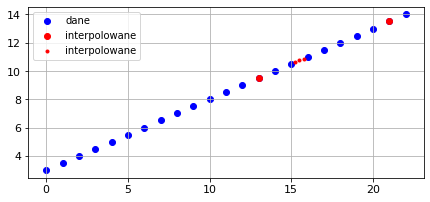

In [322]:
%matplotlib inline
fig,  ax =  plt.subplots(nrows=1, ncols=1, figsize=(18/2.54, 8/2.54))

# wykres punktów funkcji f(x)
ax.scatter(xy_gaps[:,0],xy_gaps[:,1], marker = 'o', color = 'blue', label ='dane') 
ax.scatter(gaps[:,0], gaps[:,1], marker = 'o', color = 'red', label ='interpolowane') 
ax.scatter(ext_xy[:,0], ext_xy[:,1], marker = '.', color = 'red', label ='interpolowane')

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f')) # po zaimportowaniu:from matplotlib.ticker import FormatStrFormatter
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f')) # po zaimportowaniu:from matplotlib.ticker import FormatStrFormatter

ax.legend()
plt.show()

### 2. Interpolacja dwuliniowa <a name="zad2"></a>
Interpolacja dwuliniowa (ang. *bilinear interpolation*) – metoda rozszerzająca interpolację liniową na interpolację funkcji dwóch zmiennych. Intuicyjnie jest złożeniem dwóch interpolacji liniowych.

W celu przeprowadzenia interpolacji dwuliniowej przeprowadza się dwie interpolacje liniowe dla jednego kierunku (np. wzdłuż osi OX w układzie współrzędnych kartezjańskich, a następnie dla tak uzyskanych wartości przeprowadza się interpolację liniową dla drugiego kierunku (w tym przypadku osi OY.

Najpierw przeprowadzana jest interpolacja liniowa wzdłuż osi **OX** na podstawie wzoru:

$$
f(R_{1})\approx {\frac {x_{2}-x}{x_{2}-x_{1}}}f(Q_{11})+{\frac {x-x_{1}}{x_{2}-x_{1}}}f(Q_{21})\quad {\mbox{gdzie}}\quad R_{1}=(x,y_{1})$$

$$ f(R_{2})\approx {\frac {x_{2}-x}{x_{2}-x_{1}}}f(Q_{12})+{\frac {x-x_{1}}{x_{2}-x_{1}}}f(Q_{22})\quad {\mbox{gdzie}}\quad R_{2}=(x,y_{2})$$

Następnie przeprowadzana jest interpolacja wzdłuż osi OY:

$$ f(P)\approx {\frac {y_{2}-y}{y_{2}-y_{1}}}f(R_{1})+{\frac {y-y_{1}}{y_{2}-y_{1}}}f(R_{2})$$


<a rel="license" href="https://upload.wikimedia.org"><img alt="Interpolacja dwuliniowa" style="border-width:0" src="https://upload.wikimedia.org/wikipedia/commons/e/e7/Bilinear_interpolation.png" width="25%" /></a>

#### 2a Zadanie interpolacja dwuliniowa   <a name="zad2a"></a>

Napisz funkcję interpolacji biliniowej, która jako wartości argumentów przyjmuje:
- x, y - współrzędne na które wartość ma zostać wyinterpolowana
- nearest_points  - listę, zawierajaca listy 4 najblizszych punktów potrzebnych do interpolacji

Funkcja powinna zwracać awrtośc punktu wyinterpolowanego na współrzedne (x, y).

Funkcja powinna również sprawdzać, nastepujące warunki: 
- czy 4 najbliższe punkty tworzą prostokąt,
- czy punkt na który nalezy wyinterpolowac wartość jest wewnątrz prostokąta

Wyniki danych punktów oraz punktu interpolowanego przedstaw na wykresie.

In [1]:
#testowe dane
pkt = [[0, 1, 12],
       [4, 1, 0],
       [0, 3, -4],
       [4, 3, 8] ]
print(sorted(pkt))

def bi_nterpolation(x, y, nearest_points):
    pts = sorted(nearest_points)      
    (x1, y1, q11), (_x1, y2, q12), (x2, _y1, q21), (_x2, _y2, q22) = pts
    
    if x1 != _x1 or x2 != _x2 or y1 != _y1 or y2 != _y2:
        print('Punkty nie tworzą prostokata')
    if not x1 <= x <= x2 or not y1 <= y <= y2:
        print('Interpolowany punkt (x, y) nie jest wewnątrz prostokąta')
    p_interp = (q11 * (x2 - x) * (y2 - y) +  q21 * (x - x1) * (y2 - y) +
         q12 * (x2 - x) * (y - y1) + q22 * (x - x1) * (y - y1)) / ((x2 - x1) * (y2 - y1))
    return p_interp


x, y = 2, 2
p = bi_nterpolation(2,2, pkt)  

[[0, 1, 12], [0, 3, -4], [4, 1, 0], [4, 3, 8]]


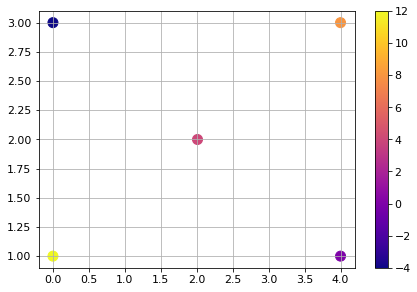

In [256]:
fig,  ax =  plt.subplots(nrows=1, ncols=1, figsize=(18/2.54, 12/2.54))
plt.scatter(x, y, c=p, vmin=-4, vmax=12, s=10**2, cmap='plasma')
sc = plt.scatter(np.array(points)[:,0], np.array(points)[:,1], c=np.array(points)[:,2], vmin=-4, vmax=12, s=10**2, cmap='plasma')
plt.colorbar(sc)
plt.show()

#### 2b Zadanie interpolacja dwuliniowa  - wyszukiwanie najbliższych punktów  <a name="zad2a"></a>
Dla danych grid (wygenerowanych poniżej):


Wykonaj interpolację dwuliniową wartości z dla punktów o współrzędnych:
[-2, -2]
[-2, 2]
[2, 2]
[2, - 2]

In [260]:
x = np.linspace(-5, 5, 6)
y = np.linspace(-5, 5, 6)
# fill coorindate arrays
xx, yy = np.meshgrid(x, y) # grid xy 
zz = np.sqrt(xx**2 + yy**2)# z 
zzz = ellipse = xx * 2 + 4 * yy**2

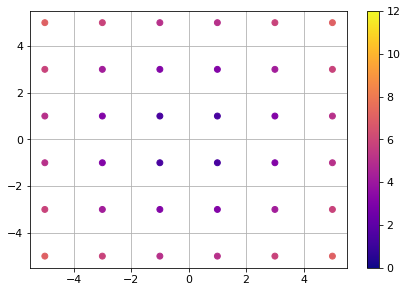

In [250]:
#color map: https://matplotlib.org/stable/gallery/color/colormap_reference.html
fig,  ax =  plt.subplots(nrows=1, ncols=1, figsize=(18/2.54, 12/2.54))
sc = plt.scatter(xx ,yy, c=zz, vmin=0, vmax=12, s=35, cmap='plasma')
plt.colorbar(sc)
plt.show()

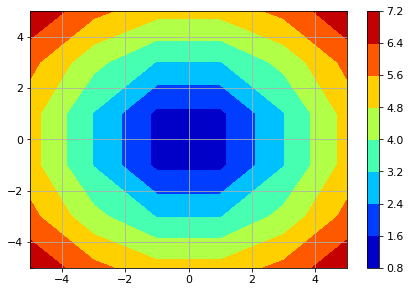

In [273]:
fig,  ax =  plt.subplots(nrows=1, ncols=1, figsize=(18/2.54, 12/2.54))
# wykres punktów funkcji f(x)
sc = plt.scatter(x, y,  label ='najbliższe xy0') 
h = plt.contourf(x, y, zz, cmap = 'jet')
plt.colorbar(h)
plt.show()

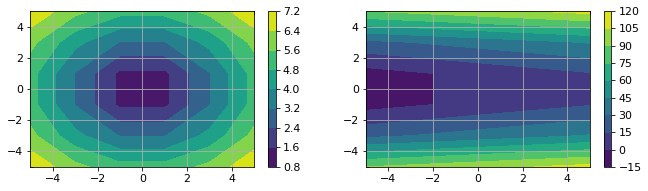

In [293]:
fig =  plt.figure(figsize=(28/2.54, 16/2.54))
#
ax1 = fig.add_subplot(221) 
ax1.scatter(x, y, marker = 'o', color = 'red', label ='zz') 
a1 = ax1.contourf(x, y, zz)
plt.colorbar(a1)

ax2 = fig.add_subplot(222) 
ax2.scatter(x, y, marker = 'o', color = 'red', label ='zzz') 
a2 = ax2.contourf(x, y, zzz)
plt.colorbar(a2)
 
plt.show()

### 3 porównanie interpolacji dostepnych w bibliotekach - praca domowa  <a name="zad3"></a>
Dla danych z zadania 2b wykonaj interpolację za pomocą 3 wybranych funkcji dostępnych w bibliotece: scipy.interpolate
Wyniki przedstaw na rysunku.